Notebook for testing nn performance

In [2]:
# import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing import extract_csv_info, format_data, shuffle_and_split, split_input_output
from neural import train_and_generate_feedforward_network, train_and_generate_recurrent_network, train_and_generate_preisach_network, train_and_generate_recurrent_preisach_network

In [3]:
# Function to compute MSE of predicted values
def compute_mse(actual_y, predicted_y):
    actual_y = np.asarray(actual_y)
    predicted_y = np.asarray(predicted_y)
    diff = np.subtract(actual_y, predicted_y)
    squared = np.square(diff)
    mse = np.mean(squared)
    return mse


# test compute mse
# y = [11, 20, 19, 17, 10]
# y_pred = [12, 18, 19.5, 18, 9]
# print(compute_mse(y, y_pred))

In [4]:
# Function for plotting predicted values from NN
# TODO: add figsize and xlim as input to function to allow customization
def plot_predicted(next_h, next_b, model_name):
    plt.figure(figsize=(20, 12))
    plt.xlim(-750, 750)
    plt.plot(next_h, next_b, marker="o", color='black')
    plt.title(model_name + " Output Plot")
    plt.xlabel("Magnetic Field H (T)")
    plt.ylabel("Magnetic Flux B (A/m)")
    plt.show()

## Data Loading and Preprocessing

In [5]:
# Load data for training
raw_train_data = extract_csv_info("./data_simulated/M19_29Gauge - Sheet1.csv")
# format into (current H, current B, next H, next B)
formatted_data = format_data(raw_train_data)
#train, test = shuffle_and_split(formatted_data)
train_x, train_y = split_input_output(formatted_data)
#test_x, test_y = split_input_output(test)


In [6]:
# Load data for testing
raw_test_data = extract_csv_info("./data_simulated/M19_TESTINGDATA - M19_TESTINGDATA.csv")
formatted_test_data = format_data(raw_test_data)
test_x, test_y = split_input_output(formatted_test_data)

# Separate next_h values into separate list for plotting output
test_next_h = list()
for i in range(len(test_x)):
    test_next_h.append(test_x[i][2])


## Feedforward Network

In [7]:
# Generate and train feedforward network
feedforward_model = train_and_generate_feedforward_network(train_x, train_y, "feedforward.model", n_epochs=20)

Epoch 1/20
63/63 [==============================] - 3s 3ms/step - loss: 0.9075 - mean_squared_error: 0.9075
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 3/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 6/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 7/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 8/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 9/20
63/63 [==============================] - 0s 3ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 10/20
63/63 [=========

In [8]:
# Load feedforward model
feedforward_model = tf.keras.models.load_model("./models/feedforward.model")

In [9]:
# Evaluate feedforward network
feedforward_prediction = feedforward_model.predict(test_x)
mse = compute_mse(test_y, feedforward_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
feedforward_model.evaluate(test_x, test_y)

37/37 [==============================] - 0s 1ms/step
MSE: 0.8862479055527299
37/37 [==============================] - 0s 2ms/step - loss: 0.0395 - mean_squared_error: 0.0395  


[0.039549488574266434, 0.039549488574266434]

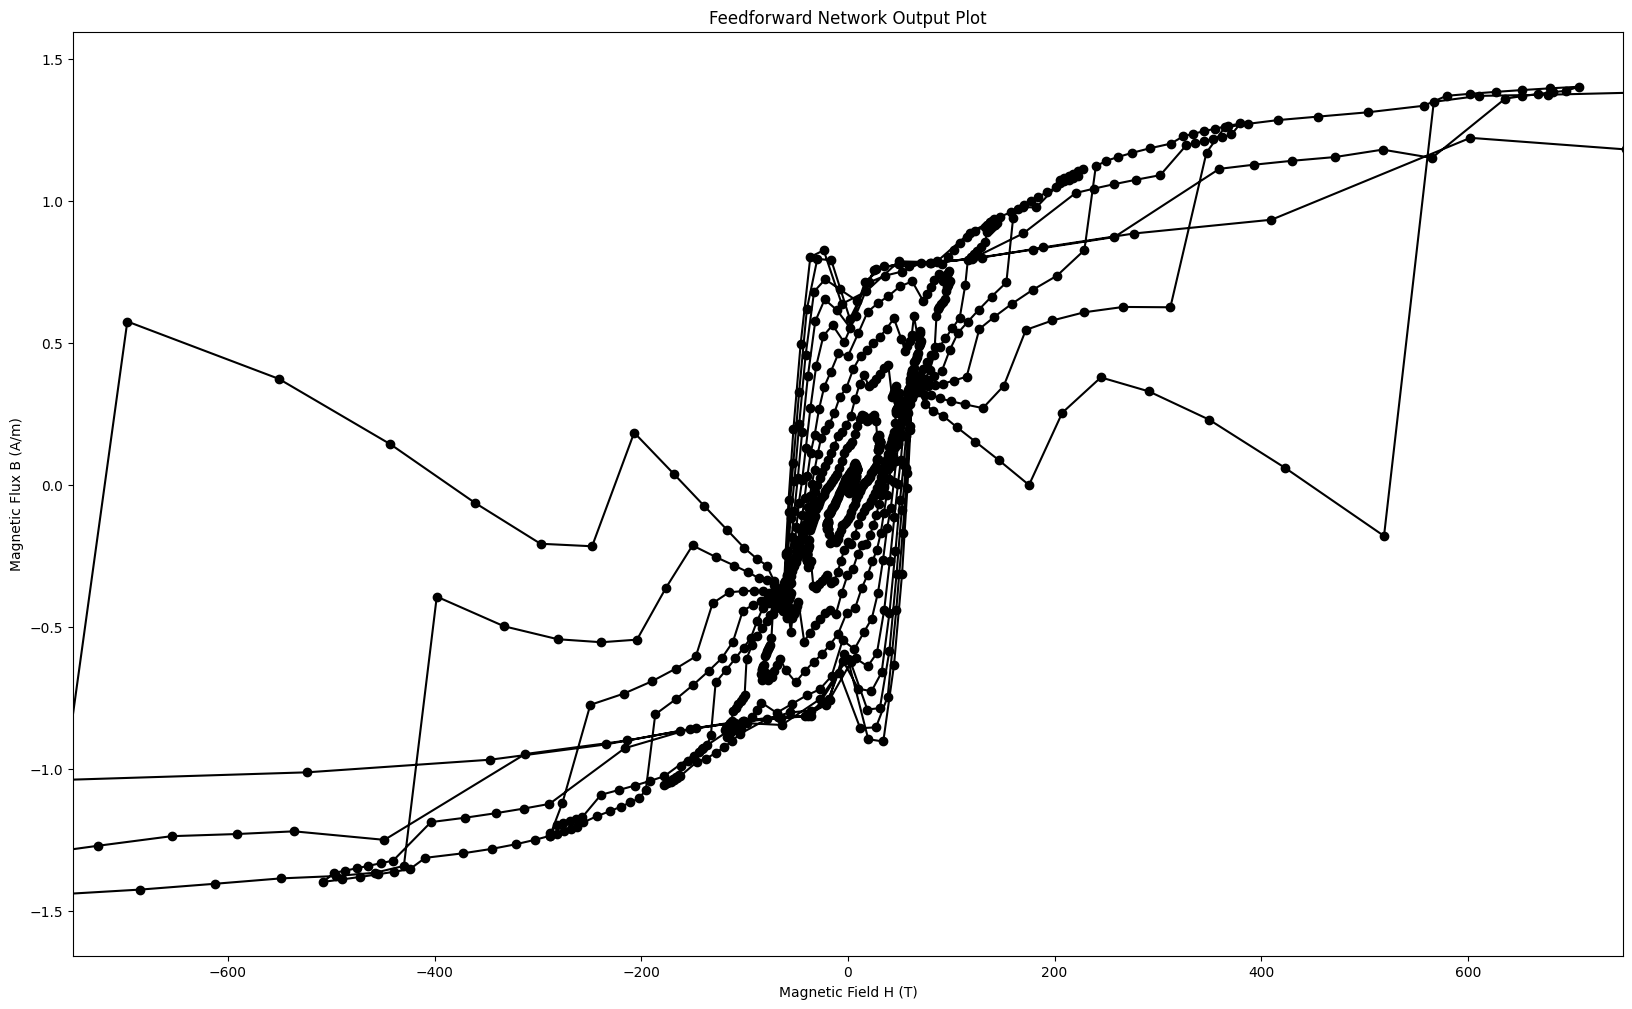

In [10]:
# Plot feedforward output
plot_predicted(test_next_h, feedforward_prediction, "Feedforward Network")


## Preisach Network

In [20]:
# Generate and train preisach network
pnn_model = train_and_generate_preisach_network(train_x, train_y, "preisach.model", n_epochs=20)

Epoch 1/20
63/63 [==============================] - 1s 5ms/step - loss: 0.1998 - mean_squared_error: 0.1998
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 8/20
63/63 [==============================] - 0s 5ms/step - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 9/20
63/63 [==============================] - 0s 6ms/step - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 10/20
63/63 [=========

In [21]:
# Load preisach model
pnn_model = tf.keras.models.load_model("./models/preisach.model")

In [22]:
#Evaluate preisach model
pnn_prediction = pnn_model.predict(test_x)
mse = compute_mse(test_y, pnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
pnn_model.evaluate(test_x, test_y)

37/37 [==============================] - 0s 1ms/step
MSE: 0.8131388441065254
37/37 [==============================] - 0s 2ms/step - loss: 0.0496 - mean_squared_error: 0.0496


[0.04962395504117012, 0.04962395504117012]

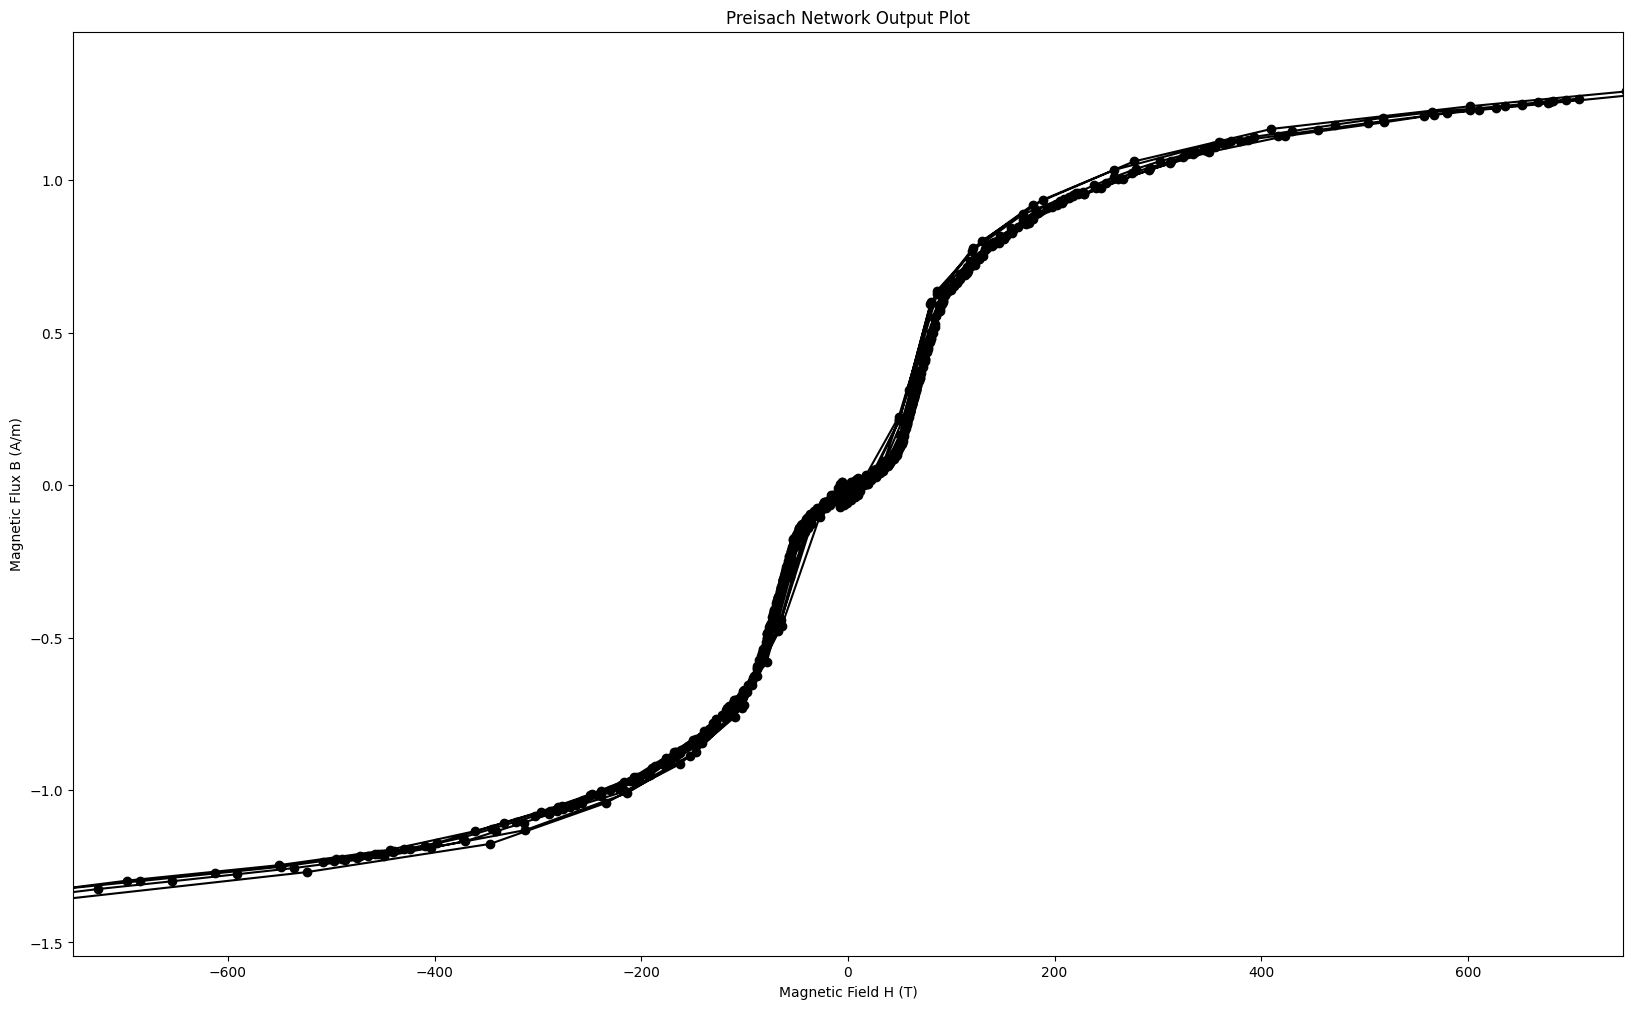

In [23]:
# Plot Preisach output
plot_predicted(test_next_h, pnn_prediction, "Preisach Network")

## Recurrent Network
no stop activation layer

In [ ]:
# Generate and train recurrent network (no stop operator)
rnn_model = train_and_generate_recurrent_network(train_x, train_y, "recurrent.model", n_epochs=20)

Epoch 1/20


In [ ]:
# Load recurrent network
rnn_model = tf.keras.models.load_model("./models/recurrent.model")

In [ ]:
# Evaluate recurrent model
rnn_prediction = rnn_model.predict(test_x)
mse = compute_mse(test_y, rnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
rnn_model.evaluate(test_x, test_y)



## Recurrent Preisach Network
includes stop activation layer

In [24]:
# Generate and train recurrent preisach network
rnn_model = train_and_generate_recurrent_preisach_network(train_x, train_y, "recurrent_preisach.model", n_epochs=20)

Epoch 1/20
(None, 1)
(None, 1)
(None, 1)


ValueError: in user code:

    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Niilo\AppData\Local\Temp\__autograph_generated_filek1kngb9_.py", line 20, in tf__call
        ag__.converted_call(ag__.ld(self).prev_out.assign, (ag__.ld(e),), None, fscope)

    ValueError: Exception encountered when calling layer "recurrent_preisach_layer" "                 f"(type RecurrentPreisachLayer).
    
    in user code:
    
        File "C:\Users\Niilo\Documents\GitHub\ecse458_plotter\custom_activation.py", line 49, in call  *
            self.prev_out.assign(e)
    
        ValueError: Cannot assign value to variable ' recurrent_preisach_layer/Variable:0': Shape mismatch.The variable shape (1,), and the assigned value shape (None, 1) are incompatible.
    
    
    Call arguments received by layer "recurrent_preisach_layer" "                 f"(type RecurrentPreisachLayer):
      • input=tf.Tensor(shape=(None, 1), dtype=float32)
      • mask=None


In [ ]:
rnn_prediction = rnn_model.predict(test_x)
plot_predicted(test_next_h, rnn_prediction, "R Preisach Network")

